In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca_cov
import time

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Notes

In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:

- `np.linalg.eig`

**NOTE:** The numpy functions that you have been using so far are fine to use.

## Task 1: Principal component analysis using the covariance matrix

In this task, you will implement principal component analysis (PCA) using the covariance matrix method, test your code, plot the results on the Iris dataset, then run PCA and analyze on several other datasets

### 1a) Import Iris data

- In the below cell, load in the Iris dataset into a pandas DataFrame.
- Print out the head (only showing the first 5 data samples).
- Create an `PCA_COV` object called `pca` based on the DataFrame object that you just created.

In [2]:
iris_data = pd.read_csv('data/iris.csv')
print(iris_data.head(5))
pca = pca_cov.PCA_COV(iris_data)

   sepalLength  sepalWidth  petalLength  petalWidth  species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0


### 1b) Implement PCA

Implement and test the following methods necessary to perform PCA in `pca_cov.py`.

#### (i) Test `covariance_matrix`

In [5]:
# Test covariance here
np.random.seed(0)
d = np.random.randn(100, 3)
cov_mat = pca.covariance_matrix(d)
print(f'Covariance matrix has shape {cov_mat.shape} and should be (3, 3)')
print(f'Covariance matrix is:\n{cov_mat}')

Covariance matrix has shape (3, 3) and should be (3, 3)
Covariance matrix is:
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]]


#### (ii) Test `prop_var`

Takes eigenvalues ordered large-to-small and computes the proportion of the total variance account for by the $k^{th}$ principal component.

In [7]:
# Test prop_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
print(f'Proportion variance list length is {len(prop_var)}')
print(f'Proportion variance list begins with\n{prop_var[:2]}')

Proportion variance list length is 10
Proportion variance list begins with
[0.15649813681155653, 0.1448232917174111]


#### (iii) Test `compute_cum_var`

Takes proportion variance for principal components, ordered large-to-small, and computes the cumulative sum (cumulative variance accounted for by the first $k$ principal components).

In [8]:
# Test accum_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
accum_var = pca.compute_cum_var(prop_var)
print(f'Cumulative variance list length is {len(accum_var)}')
print(f'Cumulative variance list begins with\n{accum_var[:2]}')

Cumulative variance list length is 10
Cumulative variance list begins with
[0.15649813681155653, 0.3013214285289676]


#### (iv) Test `pca`

Performs PCA using the covariance matrix method.

In [12]:
# Test pca (no normalization) here
iris_headers = list(iris_data.columns[:-1])
# print(iris_headers)
pca.pca(iris_headers)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA.')
print(f'The original PCA data has shape {pca.A.shape}.')
print(f'Eigenvector shape: {pca.e_vecs.shape}.\nEigenvalue shape: {pca.e_vals.shape}.')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())}.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())}.')
print()

# Test values
print(f"Vars in Iris PCA:\n{pca.vars}")
print(f'Eigenvectors:\n{pca.e_vecs}.')
print(f'Eigenvalues:\n{pca.e_vals}.')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}.')


There are 4 vars in Iris PCA.
The original PCA data has shape (150, 4).
Eigenvector shape: (4, 4).
Eigenvalue shape: (4,).
Length of proportion variance account for: 4.
Length of cumulative proportion variance account for: 4.

Vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Eigenvectors:
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972]
 [ 0.85667  0.17337  0.07624 -0.47984]
 [ 0.35829  0.07548  0.54583  0.75366]].
Eigenvalues:
[4.22824 0.24267 0.07821 0.02384].
Cumulative proportion variance account for:
[0.9246187232017269, 0.9776852063187947, 0.9947878161267245, 0.9999999999999998].


In [13]:
# Test pca (normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers, normalize=True)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA.')
print(f'The original PCA data has shape {pca.A.shape}.')
print(f'Eigenvector shape: {pca.e_vecs.shape}.\nEigenvalue shape: {pca.e_vals.shape}.')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())}.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())}.')
print(f'Data min/max is {pca.A.min()}/{pca.A.max()}')
print()

# Some test values
print(f'Your eigenvalues:\n{pca.e_vals}.')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}.')

There are 4 vars in Iris PCA.
The original PCA data has shape (150, 4).
Eigenvector shape: (4, 4).
Eigenvalue shape: (4,).
Length of proportion variance account for: 4.
Length of cumulative proportion variance account for: 4.
Data min/max is 0.0/1.0

Your eigenvalues:
[0.23245 0.03247 0.0096  0.00176].
Cumulative proportion variance account for:
[0.8413603821315431, 0.9588784639918414, 0.993614078079774, 0.9999999999999999].


#### (v) Test `elbow_plot`

Visualize the cumulative proportion variance accounted for by the first $k$ principal components.

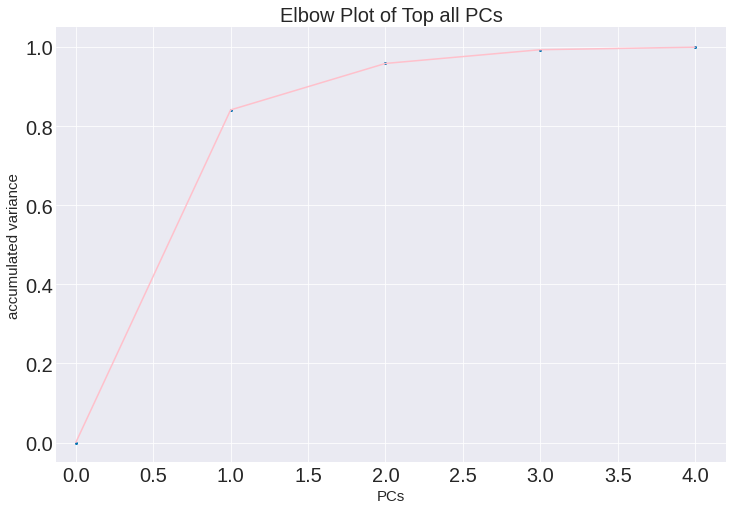

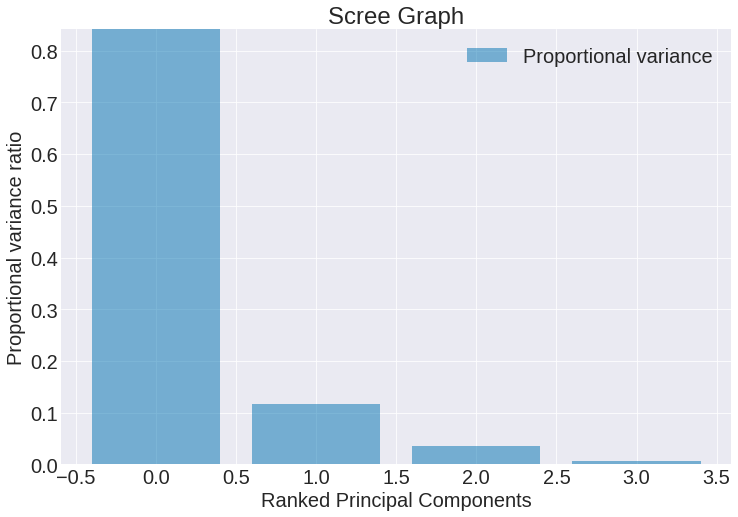

In [8]:
# test elbow plot
pca.elbow_plot()
pca.scree_plot()
plt.show()

From the graph, the cumulative explained variance are very high when we have the first two principle components. Let's drop two principle components. 

#### (vi) Test `pca_project`

Project the data onto a list of the top $2$ principal components (`pcs_to_keep = [0, 1]`)

In [9]:
num_dims = 2
pcs_to_keep = np.arange(num_dims)
iris_proj = pca.pca_project(pcs_to_keep)
print(iris_proj.shape)

(150, 2)


##### Plot PCA projected Iris data

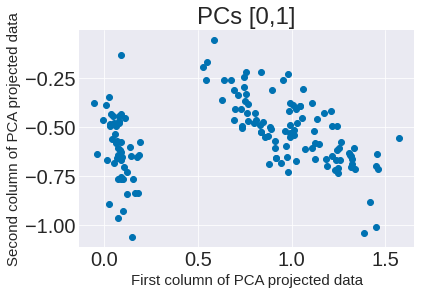

In [10]:
plt.scatter(iris_proj[:, 0], iris_proj[:,1])
plt.xlabel('First column of PCA projected data', fontsize=15)
plt.ylabel('Second column of PCA projected data', fontsize=15)
plt.title('PCs [0,1]')
plt.show()


### 1c) Dropping different pairs of principal components

- In the cell below, create a "high quality" 2x2 subplots grid of scatterplots that drops different consective PCs from the data, then project onto the remaining PCs.

The 2x2 plots keep:
- (top-left) PCs [2, 3]
- (top-right) PCs [1, 2]
- (bottom-left) PCs [3, 0]
- (bottom-right) PCs [0, 1]

High quality means
- x and y axis label indicating the PC (e.g. PC1)
- title indicating the PCs shown in the plot

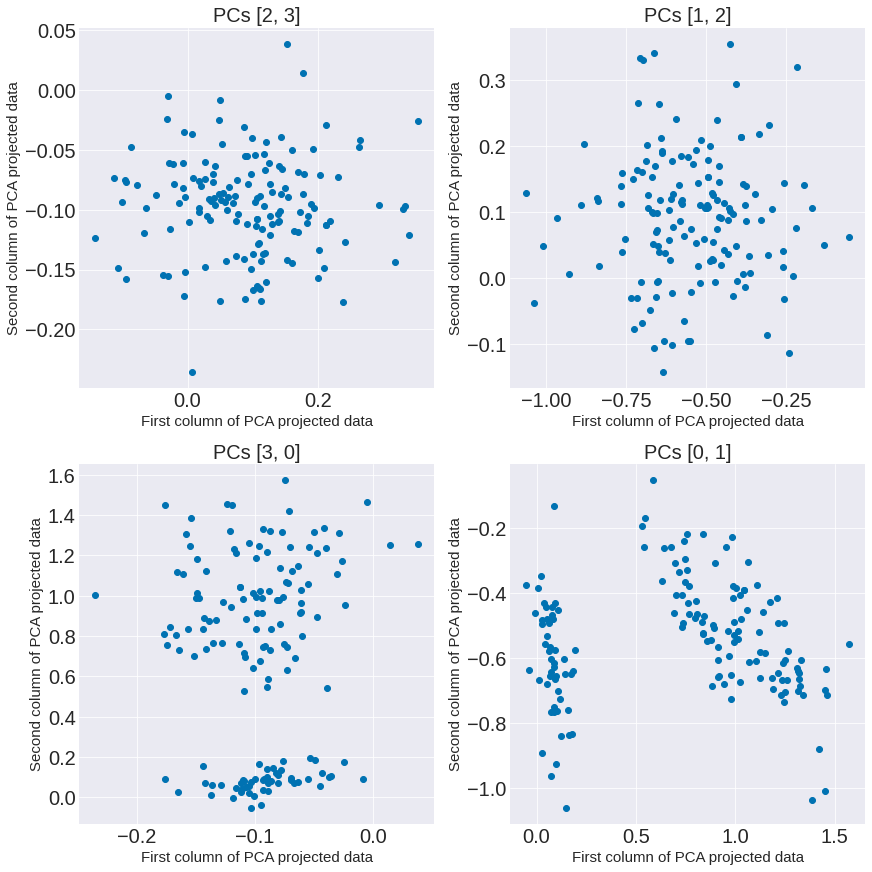

In [11]:
plt.rcParams['figure.constrained_layout.use'] = True

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))

iris_proj = pca.pca_project([2,3])
ax1.scatter(iris_proj[:,0], iris_proj[:,1])
ax1.set_title('PCs [2, 3]', fontsize=20)
ax1.set_xlabel('First column of PCA projected data', fontsize=15)
ax1.set_ylabel('Second column of PCA projected data', fontsize=15)

iris_proj = pca.pca_project([1,2])
ax2.scatter(iris_proj[:,0], iris_proj[:,1])
ax2.set_title('PCs [1, 2]', fontsize=20)
ax2.set_xlabel('First column of PCA projected data', fontsize=15)
ax2.set_ylabel('Second column of PCA projected data', fontsize=15)

iris_proj = pca.pca_project([3,0])
ax3.scatter(iris_proj[:,0], iris_proj[:,1])
ax3.set_title('PCs [3, 0]', fontsize=20)
ax3.set_xlabel('First column of PCA projected data', fontsize=15)
ax3.set_ylabel('Second column of PCA projected data', fontsize=15)

iris_proj = pca.pca_project([0,1])
ax4.scatter(iris_proj[:,0], iris_proj[:,1])
ax4.set_title('PCs [0, 1]', fontsize=20)
ax4.set_xlabel('First column of PCA projected data', fontsize=15)
ax4.set_ylabel('Second column of PCA projected data', fontsize=15)

plt.show()

From the plots, we find that PC1 represents the highest variance of the data, the second highest is PC2, while the variance of PC3 and PC4 is obviously lower than PC1 and PC2. Therefore, we will keep PC1 and PC2.

### 1e) Reconstruct data based on PCs

- In the cell below, create a scatter plot of the two data variables `sepalLength` (x), `sepalWidth` (y) of the Iris data **without any normalization**.
- In the 2nd cell below, do PCA **on the normalized Iris data** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepalLength`, `sepalWidth` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.

['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']


Text(0.5, 1.0, 'sepalLength vs. sepalWidth')

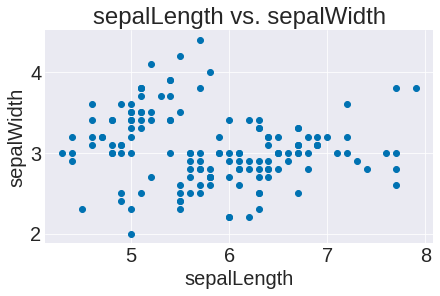

In [12]:
# Plot original iris data
iris_data = pd.read_csv('data/iris.csv')
iris_headers = list(iris_data.columns[:-1])
print(iris_headers)
pca.pca(iris_headers)

plt.scatter(iris_data['sepalLength'], iris_data['sepalWidth'])
plt.xlabel('sepalLength')
plt.ylabel('sepalWidth')
plt.title('sepalLength vs. sepalWidth')

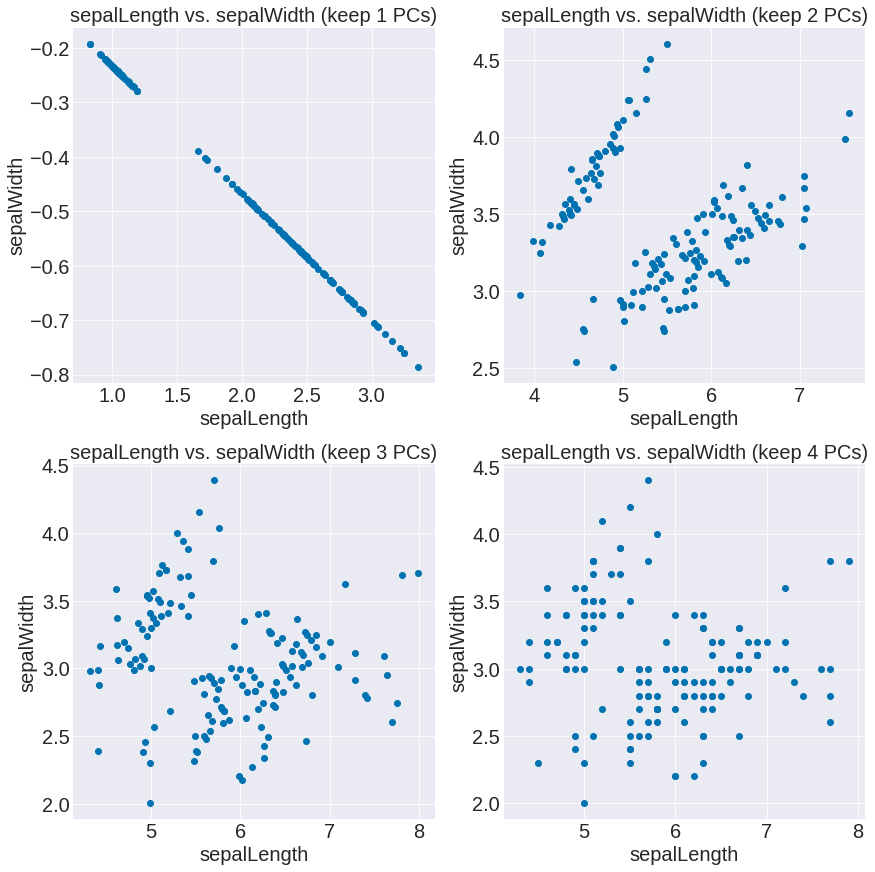

In [13]:
# 2x2 grid of scatter plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))
axes = [ax1, ax2, ax3, ax4]
for i in range(4):
    data_back = pca.pca_then_project_back(i+1)
    axes[i].scatter(data_back[:,0], data_back[:,1])
    axes[i].set_xlabel('sepalLength')
    axes[i].set_ylabel('sepalWidth')
    axes[i].set_title(f'sepalLength vs. sepalWidth (keep {i+1} PCs)', fontsize = 20)
    
plt.show()

In the first graph, we keep one PC and the re-projection shows a negative straight line which completely different from the original data. In the second graph, we keep two PCS and the re-projections show two clusters of data which is slightly similar to the original data since the original data also has two separated part. In the third graph, we keep three PCs and the re-projection is roughly the same as the orignal data. Of course, when we keep all PCs, we get back the original data.

## Task 2: Eigenfaces. Perform PCA on face images

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a link to original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 2a) Load in LFWcrop face dataset

More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/

In [14]:
from zipfile import ZipFile
import io

with ZipFile('data/lfwcrop.zip') as z:
    face_imgs =  np.load(io.BytesIO(z.read('lfwcrop.npy')))
face_names = np.loadtxt('data/lfwcrop_ids.txt', dtype=str, delimiter='\n')

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 2b) Look at the face data

- In the cell below, create a function to create a 5x5 subplots grid of plots. In each plot, show one of the first 25 images in the dataset.

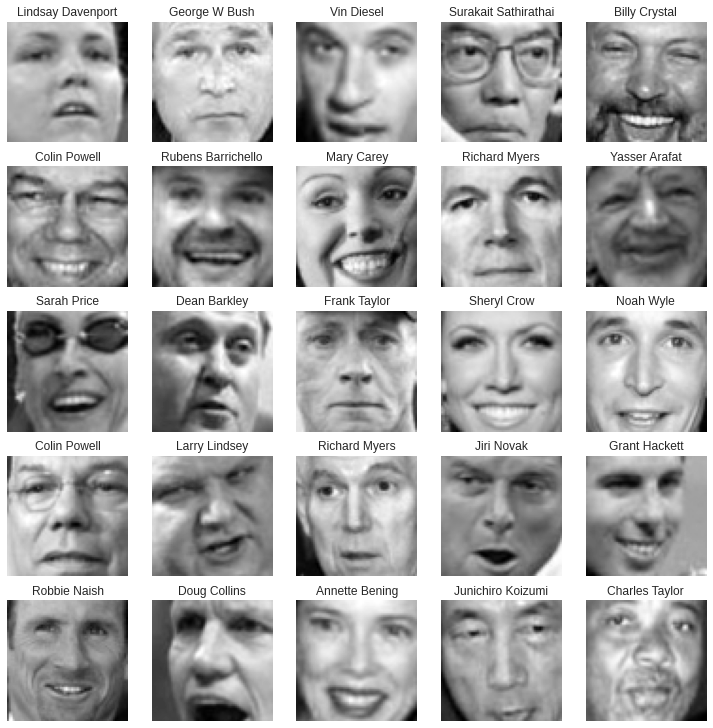

In [15]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    '''
    fig, axes = plt.subplots(5, 5, sharex='col', sharey='row', figsize=(10,10))

    for i in range(5):
        for j in range(5):
            axes[i,j].imshow(face_imgs[i*5+j], cmap=plt.get_cmap('gray'))
            axes[i,j].set_title(face_names[i*5+j], fontsize=12)
            axes[i,j].axis('off')

face_plot(face_imgs, face_names)


### 2c) Visualize the "mean face"

- Take the mean face image across the dataset and show it below.

[[103.62981 107.4333  111.64455 ... 113.30731 109.16756 105.13461]
 [104.10234 107.94868 112.19847 ... 113.99819 109.78293 105.71363]
 [104.59799 108.48704 112.75935 ... 114.65876 110.38553 106.28471]
 ...
 [ 93.57335  94.06848  94.6255  ...  97.44403  96.31472  95.35243]
 [ 93.33777  93.71657  94.12803 ...  96.75164  95.82677  95.04278]
 [ 93.23369  93.44781  93.6902  ...  96.21329  95.38924  94.79329]]


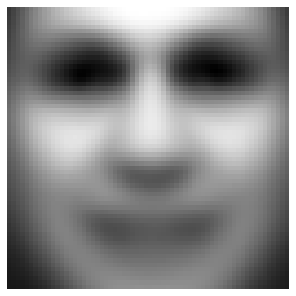

In [16]:
mean_face = np.mean(face_imgs, axis=0)
print(mean_face)

plt.imshow(mean_face, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()


The mean face image show information about what the most images are in one pixel. We can find that most faces are smile faces.

### 2d) Preprocess face data

In the face dataset, each person is a sample and each pixel is a variable. Currently, the face data has shape = `(13231, 64, 64)` or $N = 13231$ samples and $M = 64*64 = 4096$ pixels. To run PCA, we'll need to \"unravel\" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code. Let's reshape the face data to make this so.

In [17]:
# Your reshape code here
face_imgs_vec = np.reshape(face_imgs, (13231, 64*64))

print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')

Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 2e) Perform PCA on preprocessed face data

- Create pandas DataFrame object that holds the face data. The header names of consecutive integers `0, 1, ..., 4095` are fine.
- Create `PCA_COV` object that holds the face DataFrame.
- Run PCA. For `vars` pass in a Python list of ints (`0, 1, ..., 4095`).

In [18]:
%%time
face_imgs_df = pd.DataFrame(face_imgs_vec)
face_imgs_df.columns = [i for i in range(4096)]

face_pca = pca_cov.PCA_COV(face_imgs_df)
face_pca.pca([i for i in range(4096)])

CPU times: user 2min 24s, sys: 5.02 s, total: 2min 29s
Wall time: 25.8 s


### 2f) Make face PCA elbow plot

- Make an elbow plot of the PCA results.

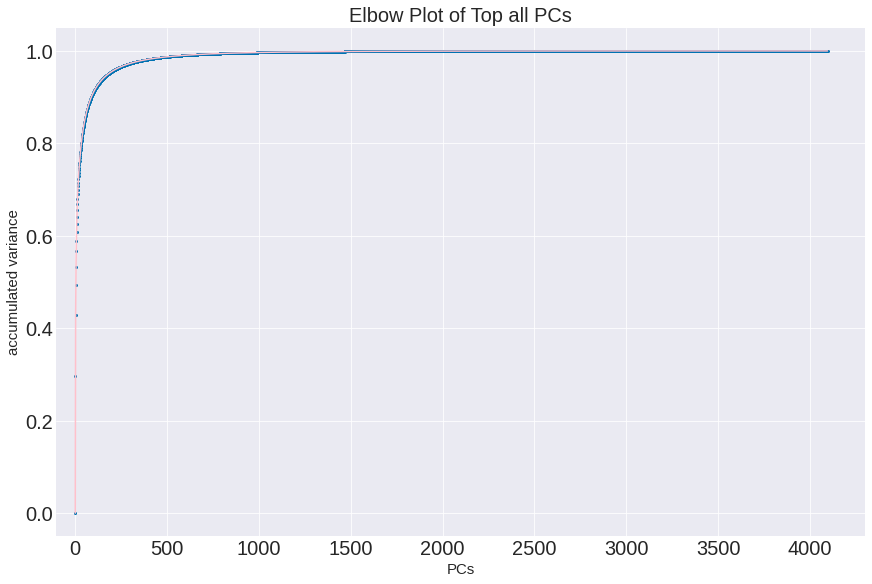

In [19]:
face_pca.elbow_plot()
plt.show()

### 2g) Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 95%


- For each of the above number of PCs, project them back onto the original data space.

In [20]:
def make_imgs(reconstucted_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    return np.reshape(reconstucted_imgs, face_imgs.shape)

#### 50% variance face grid

0.5323399174961513


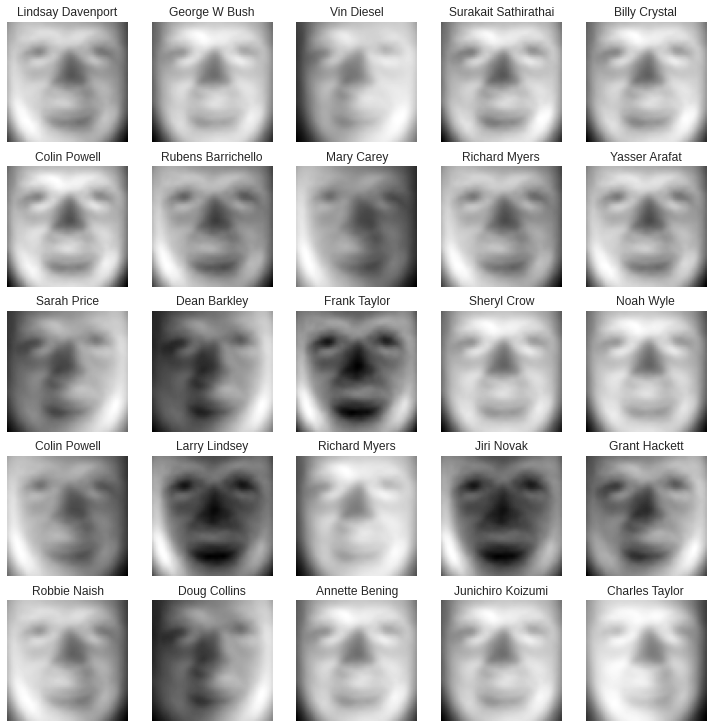

In [21]:
print(face_pca.cum_var[3])
face_vec_50 = face_pca.pca_then_project_back(3)
face_img_50 = make_imgs(face_vec_50)
face_plot(face_img_50, face_names)

#### 70% variance face grid

0.7075760626149614


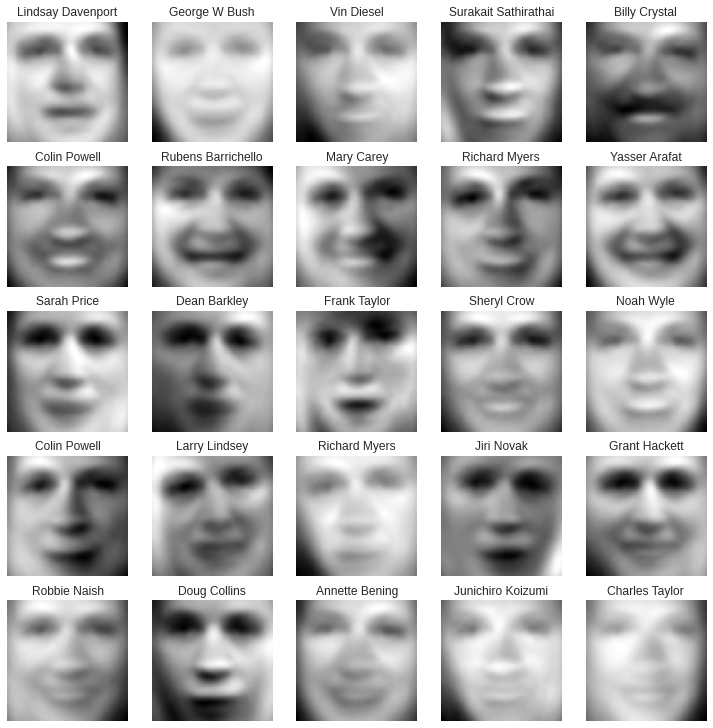

In [22]:
print(face_pca.cum_var[14])
face_vec_70 = face_pca.pca_then_project_back(14)
face_img_70 = make_imgs(face_vec_70)
face_plot(face_img_70, face_names)

#### 80% variance face grid

0.8007684906260895


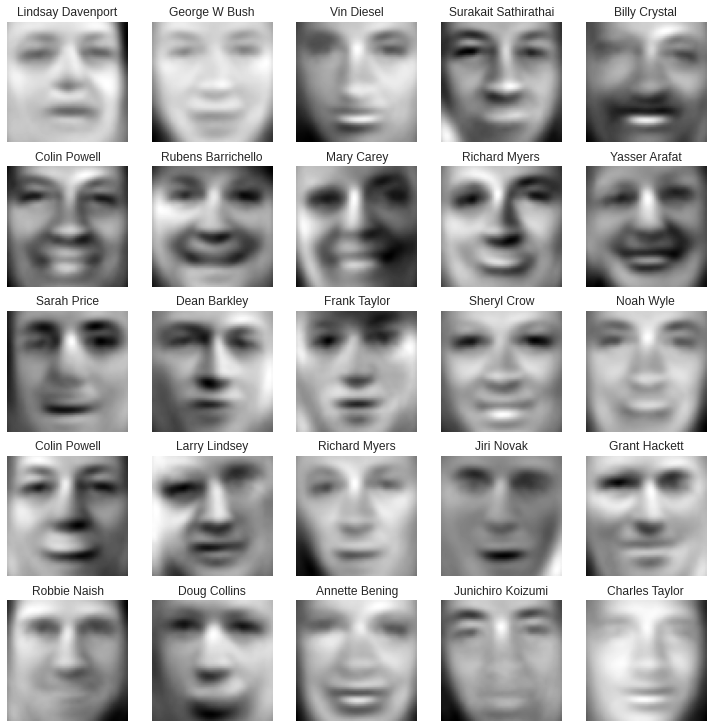

In [23]:
print(face_pca.cum_var[32])
face_vec_80 = face_pca.pca_then_project_back(32)
face_img_80 = make_imgs(face_vec_80)
face_plot(face_img_80, face_names)

#### 95% variance face grid

0.9502510649184516


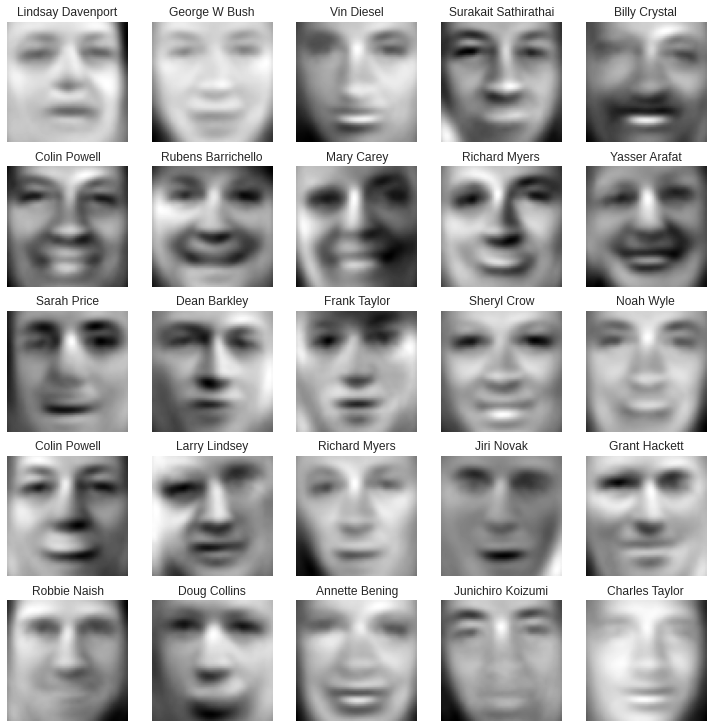

In [24]:
print(face_pca.cum_var[179])
face_vec_95 = face_pca.pca_then_project_back(32)
face_img_95 = make_imgs(face_vec_95)
face_plot(face_img_95, face_names)

In the 50% variance face grid, the shape of all faces are roughly the same. The differences between faces become much clearer when the variance increases from 50% to 95%. Moreover, the light and dark regions on faces become clearer as the increase of cumulative proportion.

### 3. Facial recognition with Eigenfaces

We can use Eigenfaces to perform facial recognition! Here is the idea:

1. Perform PCA on images of faces of people who you would like to be able to "learn" to recognize (creating a "database" of known faces). This is just like what you did in the main project.
2. Project a "query" image of a face that you would like to recognize into the PCA space established by the database of known faces (the number of PCA dimensions is up to you).  
3. Project each of the images in the face database into the same PCA space established by the database of known faces (the number of PCA dimensions is the same as before).
4. Treat the projected query image and each projected database images as vectors. Compute the Euclidean distance of the vector obtained by subtracting that of the query image and that of each database image.
5. Pick a match tolerance level. If any of the distances is less than your tolerance level, you have a match! If none of the distances is smaller than your tolerance, you don't have a match.

In [30]:
test_faces = face_imgs[-10:].copy()
test_names = face_names[-10:].copy()

faces = face_imgs[:len(face_imgs)-10].copy()
names = face_names[:len(face_imgs)-10].copy()

# create faces df
faces_vec = np.reshape(faces, (faces.shape[0], faces.shape[1]*faces.shape[2]))
faces_df = pd.DataFrame(faces_vec)
faces_df.columns = [i for i in range(faces_vec.shape[1])]

# project faces into PCA space
faces_pca = pca_cov.PCA_COV(faces_df)
faces_pca.pca([i for i in range(faces_vec.shape[1])])

Min distance: 695.1140994197748


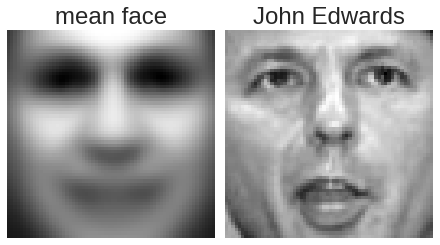

In [31]:
index = faces_pca.face_recognition(mean_face, 32, tolerance_level=696)

if index != -1:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6,12))
    ax2.imshow(faces[index], cmap=plt.get_cmap('gray'))
    ax2.set_title(names[index])
    ax2.axis('off')
    
    ax1.imshow(mean_face, cmap=plt.get_cmap('gray'))
    ax1.set_title("mean face")
    ax1.axis('off')
else:
    print("No matched face")
plt.show()

Min distance: 47.22139211446476


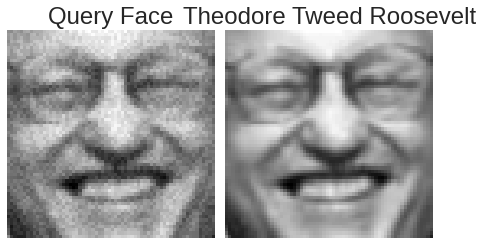

In [33]:
query_face = faces[random.randint(0, len(faces))] - (np.random.rand(64, 64) - 0.5) * 28

index = faces_pca.face_recognition(query_face, 32, tolerance_level=50)

if index != -1:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6,12))
    ax2.imshow(faces[index], cmap=plt.get_cmap('gray'))
    ax2.set_title(names[index])
    ax2.axis('off')
    
    ax1.imshow(query_face, cmap=plt.get_cmap('gray'))
    ax1.set_title("Query Face")
    ax1.axis('off')
else:
    print("No matched face")
plt.show()

